¡Hola Carlos!

Mi nombre es Facundo Lozano! Un gusto conocerte, seré tu revisor en este proyecto.

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

# Descripcipción del proyecto

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 3) </b> <a class="tocSkip"></a>

Hola Carlos! Felicitaciones porque has corregido los detalles marcados en nuestra iteración anterior! Ahora si este proyecto está en total condiciones de ser aprobado, bien hecho! Un gusto haber sido de ayuda!
    
Éxitos en tu camino dentro del mundo de los datos y saludos!

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 2) </b> <a class="tocSkip"></a>

A no preocuparse, he visto que hubo una confusión con el modelo constante Carlos pero nada que no podamos resolver en esta iteración. La corrección anterior tenía el objetivo de ajustar el modelo **DummyClassifier** que se correspnde con un modelo constante, en nuestro caso actualmente implementamos una Regresión Logística que no correpsonde con la situación, de todas formas te he deado una gran pista sobre el modelo, simplemente deberíamos completar el proceso.
    
Te espero nuevamente para nuestra próxima iteración Carlos, saludos!

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Carlos, quería tomarme este tiempo al inicio de tu proyecto para comentarte mis apreciaciones generales de esta iteración de tu entrega.

Siempre me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programador ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser un gran cientifico de datos."

Ahora si yendo a esta notebook. Te quiero felicitar porque has resuelto todos los ejercicios de una gran forma, se nota tu gran capacidad para implementar las herramientas aprendidas, lo has hehco muy bien! Sin embargo, hubo 1  situación leve en el modelo constante que amerita una pequeña corrección, te he dejado un comentario rojo con el contexto necesario. A la vez te he dejado comentarios amarillos recomendando el uso de la función **evaluate_model** que se brinda en el código y nos permite ver unos gráficos sobre la evolución del model, esto es meramente opcional ya que has hecho la tuya propia que funciona muy bien.

Éxitos y espero con ansias a nuestra próxima iteración con esta leve corrección!

Saludos!

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [1]:
import math
import re
import numpy as np
import pandas as pd
import string

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm
from tqdm import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente Carlos, un procedimiento de importación y de configuración excelente. Sigamos!

## Cargar datos

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente carga de datos!

<div class="alert alert-block alert-warning">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Previamente a continua deberíamos intentar de observar la composición de nuestros datos por tu cuenta. Te invito a que trates de implementar algunos de los métodos conocidos.

In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [6]:
# Calcular la mediana de las columnas 'average_rating' y 'votes'
median_average_rating = df_reviews['average_rating'].median()
median_votes = df_reviews['votes'].median()

# Rellenar los valores NaN con la mediana correspondiente
df_reviews['average_rating'] = df_reviews['average_rating'].fillna(median_average_rating)
df_reviews['votes'] = df_reviews['votes'].fillna(median_votes)

# Verificar que todas las columnas tengan 47331 filas
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47331 non-null  float64
 10  votes            47331 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [7]:
df_reviews.shape

(47331, 17)

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> Ahora en la carga de datos como se ha sugerido, podemos visualizar el tipo de dataframe con el cual estamos lidiando, los tipos de variables y la cantidad de data, aparte de que tambien resolvimos los datos faltantes en las columnas `average_rating` y `votes`.<a class="tocSkip"></a>
</div>

## EDA

Veamos el número de películas y reseñas a lo largo de los años.

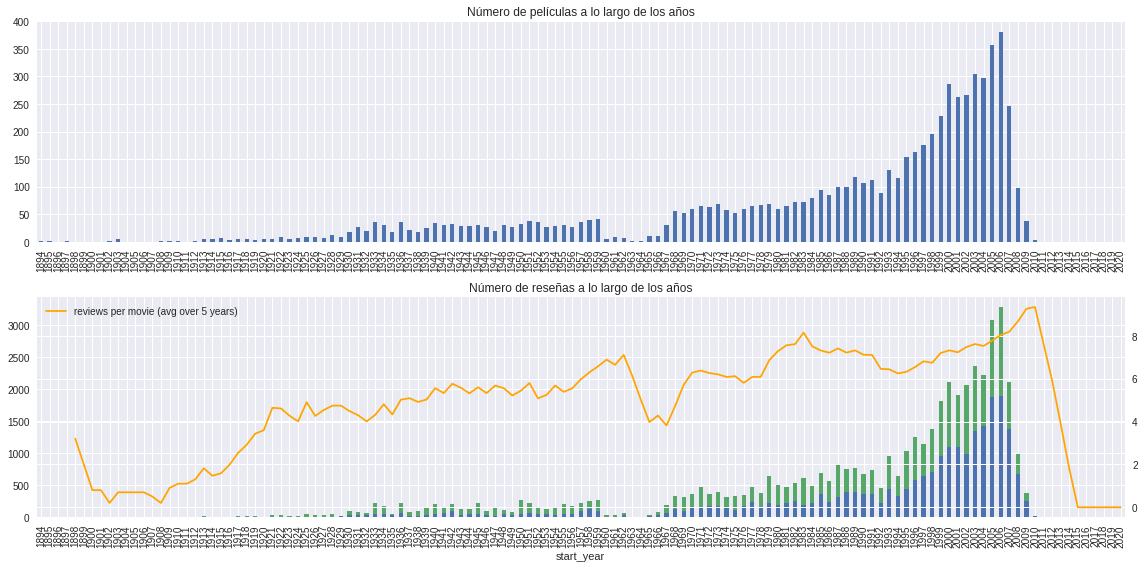

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

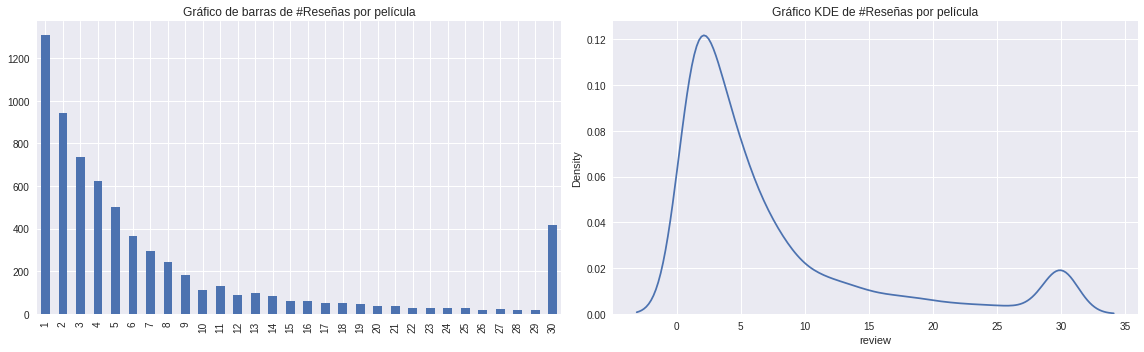

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Unas observaciones que nos permitirán comprender el trabajo que debemos realizar.

In [10]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

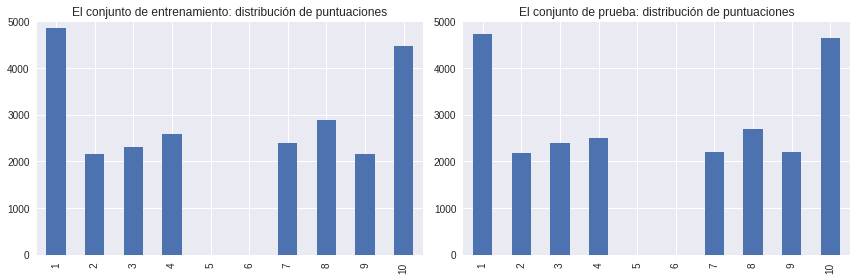

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


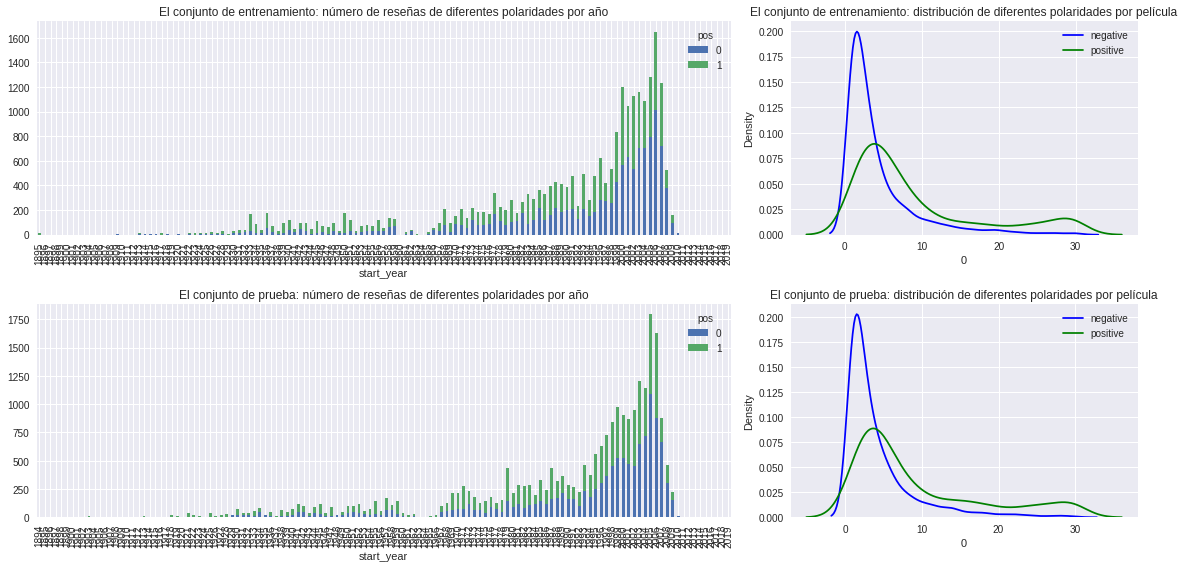

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Nuevamente excelente! Continuamos el proceso de comprensión de los datos y del problema.

## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [13]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [14]:
# Crearemos una nueva columna 'review_norm' con el texto normalizado

# Función para normalizar texto
def normalize_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar dígitos
    text = re.sub(r'\d+', '', text)
    # Eliminar signos de puntuación
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Aplicar la función de normalización a cada reseña
df_reviews['review_norm'] = df_reviews['review'].apply(normalize_text)

# Mostrar las primeras filas del DataFrame para verificar la normalización
df_reviews[['review', 'review_norm']].head()

,review,review_norm
0,The pakage implies that Warren Beatty and Gold...,the pakage implies that warren beatty and gold...
1,How the hell did they get this made?! Presenti...,how the hell did they get this made presenting...
2,There is no real story the film seems more lik...,there is no real story the film seems more lik...
3,Um .... a serious film about troubled teens in...,um a serious film about troubled teens in sin...
4,I'm totally agree with GarryJohal from Singapo...,im totally agree with garryjohal from singapor...


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Muy bien hecho Carlos! Un procedimiento de normalización correcto tras crear la función y aplicarla a las columnas correspondientes en nuestro dataframe.

## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [15]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Partimos los datos en los conjuntos de entrenamiento y testeo. Bien! Sigamos!

## Trabajar con modelos

### Modelo 0 - Constante

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

In [19]:
# Crear el vectorizador TF-IDF sin stopwords
tfidf_vectorizer = TfidfVectorizer()

# Vectorizar las reseñas de entrenamiento y prueba
train_features_0 = tfidf_vectorizer.fit_transform(df_reviews_train['review_norm'])
test_features_0 = tfidf_vectorizer.transform(df_reviews_test['review_norm'])

# Crear y entrenar el modelo DummyClassifier con la estrategia 'most_frequent'
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(train_features_0, train_target)

DummyClassifier(strategy='most_frequent')

In [20]:
# Función para evaluar el modelo
def evaluate_model(model, train_features, train_target, test_features, test_target):
    # Realizar predicciones en el conjunto de entrenamiento y prueba
    train_pred = model.predict(train_features)
    test_pred = model.predict(test_features)
    
    # Calcular la precisión y el valor F1 del modelo
    train_accuracy = accuracy_score(train_target, train_pred)
    test_accuracy = accuracy_score(test_target, test_pred)
    train_f1 = f1_score(train_target, train_pred)
    test_f1 = f1_score(test_target, test_pred)
    
    # Imprimir los resultados de la evaluación
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Training F1 Score: {train_f1:.2f}")
    print(f"Test F1 Score: {test_f1:.2f}")

Training Accuracy: 0.50
Test Accuracy: 0.50
Training F1 Score: 0.00
Test F1 Score: 0.00


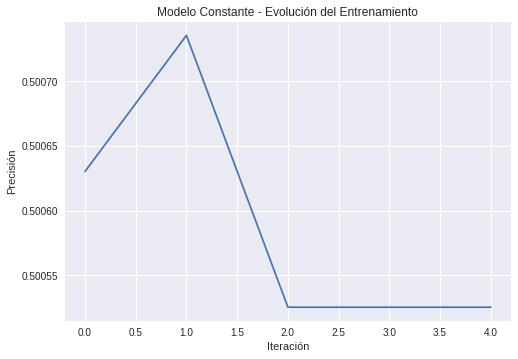

In [21]:
# Realizar validación cruzada
scores = cross_val_score(dummy_clf, train_features_0, train_target, cv=5, scoring='accuracy')

# Evaluar el modelo
evaluate_model(dummy_clf, train_features_0, train_target, test_features_0, test_target)

# Graficar la evolución del entrenamiento
plt.plot(scores)  # Suponiendo que `scores` es una lista de puntajes de precisión de validación cruzada
plt.title('Modelo Constante - Evolución del Entrenamiento')
plt.xlabel('Iteración')
plt.ylabel('Precisión')
plt.show()

<div class="alert alert-block alert-warning">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Cuidado aquí Carlos, hemos olvidado unos puntos. 
    
En primer lugar recuerda que debe ser el modelo constante, es decir que el parámetro strategy debería tener otro valor. A su vez esto nos implicaría agregar el parametro constant=1.
    
Un paso muy immportante que nos olvidamos es que lo que debemos entrenar y predecir es el valor de la columna **review_norm**, es decir que lo que debemos usar en el **fit() y el predict()** debería ser df_reviews_train["review_norm"] y train_target
    
Luego recuerda que debemos pasar nuestras observaciones a vecotres, por lo cual debemos crear un vecotirzador (**TfidfVectorizer())**, vectorizar nuestros datos de entrenamiento y utilizar para entrenar el modelo.
    
Luego deberemos predecir con nuestro modelo los valores target transformandolos a vectores. En este caso debería ser **df_review_test["review_nornm"]
    
Por último debemos pasar esto por la función **evaluate_model**
    
Trata de seguir una lógica como la recién comentada. Tu puedes! Y recuerda apoyarte en herramientas y foros que te ayuden a resolver problemas.

<div class="alert alert-block alert-warning">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Veo que debajo has aplicado los pasos que mencioné, tratemos de implementrlos también para el modelo constante.

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> Aca como se puede observar hemos corregido el fallo en la implementacion del modelo 0, para que si sea relevante en la investigacion, como los demas.<a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">

<b>Comentario del revisor. (Iteración 2)</b> <a class="tocSkip"></a>

A no preocuparse, seguro fue un mal entendido o una confusión. El modelo constante recuerda que debe ser implementado por un **DummyClassifier**, la primera recomendación estaba relacionada con cambiar el valor de strategy. Tratemos de implementar lo siguiente:
    
    
    
    Para el modelo ---> dummy_clf = DummyClassifier(strategy = 'most_frequent', constant = 1) 
    
    El proceso de entrenamiento --> **dummy_clf.fit** 
 
    Aquí podríamos evaluar con la función provista en el código inicialmente --> evaluate_model(dummy_clf, df_train,      train_target, df_test, test_target)

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante CORREGIDO 2.</b> Aca he hecho uso del modelo DummyClassifier como se me habia recomendado, lo cual nos da la real implementacion del modelo 0, para que los resultados sean los correctos.<a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 3)</b> <a class="tocSkip"></a>
    
Exelente Carlos! Ahora si muy bien hecho!

### Modelo 1 - NLTK, TF-IDF y LR

TF-IDF

In [22]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from nltk.corpus import stopwords

In [23]:
# Descargar las stopwords de NLTK
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('spanish'))  # Asegúrate de usar el idioma correcto para las stopwords

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
# Crear el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)

# Asumiendo que 'df_reviews_train['review_norm']' y 'df_reviews_test['review_norm']' contienen las reseñas normalizadas
# Vectorizar las reseñas de entrenamiento y prueba
train_features_1 = tfidf_vectorizer.fit_transform(df_reviews_train['review_norm'])
test_features_1 = tfidf_vectorizer.transform(df_reviews_test['review_norm'])

In [25]:
# Crear y entrenar el modelo de regresión logística
model_1 = LogisticRegression()
model_1.fit(train_features_1, train_target)

LogisticRegression()

In [26]:
# Función para evaluar el modelo
def evaluate_model(model, train_features, train_target, test_features, test_target):
    # Realizar predicciones en el conjunto de entrenamiento y prueba
    train_pred = model.predict(train_features)
    test_pred = model.predict(test_features)
    
    # Calcular la precisión y el valor F1 del modelo
    train_accuracy = accuracy_score(train_target, train_pred)
    test_accuracy = accuracy_score(test_target, test_pred)
    train_f1 = f1_score(train_target, train_pred)
    test_f1 = f1_score(test_target, test_pred)
    
    # Imprimir los resultados de la evaluación
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Training F1 Score: {train_f1:.2f}")
    print(f"Test F1 Score: {test_f1:.2f}")

Training Accuracy: 0.93
Test Accuracy: 0.88
Training F1 Score: 0.93
Test F1 Score: 0.88


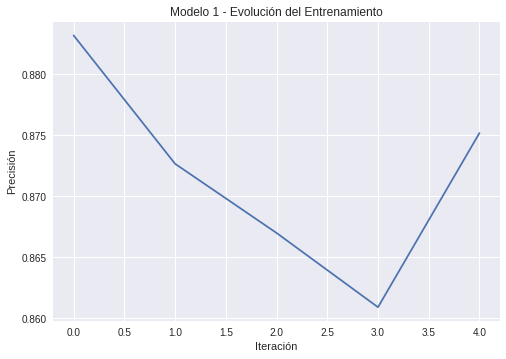

In [27]:
# Realizar validación cruzada
scores = cross_val_score(model_1, train_features_1, train_target, cv=5, scoring='accuracy')

# Evaluar el modelo
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

# Graficar la evolución del entrenamiento
plt.plot(scores)
plt.title('Modelo 1 - Evolución del Entrenamiento')
plt.xlabel('Iteración')
plt.ylabel('Precisión')
plt.show()

<div class="alert alert-block alert-warning">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Aquí lo has hecho muy bien Carlos! Y la función creada esta muy bien hechoa, excelente! Sin embargo te invito a que intentes de evaluarlo con la función evaluate_model provista anteriormente ya que esta nos permite ver gráficas sobre la evolución del entrenmiento.

### Modelo 3 - spaCy, TF-IDF y LR

In [49]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [50]:
def text_preprocessing_3(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)

In [51]:
# Aplicar la función de preprocesamiento a las reseñas normalizadas
df_reviews_train['review_spacy'] = df_reviews_train['review_norm'].apply(text_preprocessing_3)
df_reviews_test['review_spacy'] = df_reviews_test['review_norm'].apply(text_preprocessing_3)

# Crear el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

In [52]:
# Ajustar el vectorizador TF-IDF solo a los datos de entrenamiento
tfidf_vectorizer.fit(df_reviews_train['review_spacy'])

# Vectorizar las reseñas preprocesadas de entrenamiento y prueba
train_features_3 = tfidf_vectorizer.transform(df_reviews_train['review_spacy'])
test_features_3 = tfidf_vectorizer.transform(df_reviews_test['review_spacy'])

# Crear y entrenar el modelo de regresión logística
model_3 = LogisticRegression()
model_3.fit(train_features_3, train_target)

LogisticRegression()

In [53]:
# Función para evaluar el modelo
def evaluate_model(model, train_features, train_target, test_features, test_target):
    # Realizar predicciones en el conjunto de entrenamiento y prueba
    train_pred = model.predict(train_features)
    test_pred = model.predict(test_features)

    # Calcular la precisión y el valor F1 del modelo
    train_accuracy = accuracy_score(train_target, train_pred)
    test_accuracy = accuracy_score(test_target, test_pred)
    train_f1 = f1_score(train_target, train_pred)
    test_f1 = f1_score(test_target, test_pred)

    # Imprimir los resultados de la evaluación
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Training F1 Score: {train_f1:.2f}")
    print(f"Test F1 Score: {test_f1:.2f}")

Training Accuracy: 0.93
Test Accuracy: 0.88
Training F1 Score: 0.93
Test F1 Score: 0.88


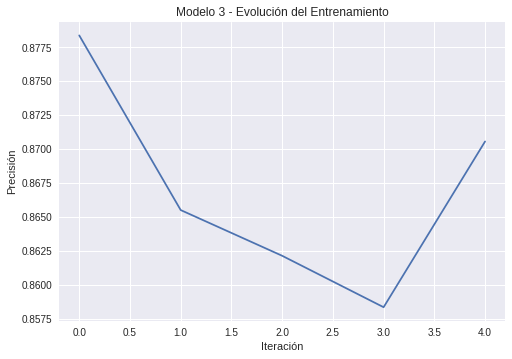

In [54]:
# Realizar validación cruzada
scores = cross_val_score(model_3, train_features_3, train_target, cv=5, scoring='accuracy')

# Evaluar el modelo
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

# Graficar la evolución del entrenamiento
plt.plot(scores)
plt.title('Modelo 3 - Evolución del Entrenamiento')
plt.xlabel('Iteración')
plt.ylabel('Precisión')
plt.show()

<div class="alert alert-block alert-warning">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Nuevamente el proceso esta genial, bien hecho Carlos! Al igual que el caso anterior, podríamos evaluarlo en la otra función que nos permitirá ver la evolución a lo largo de las predicciones en gráficos.

### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

In [34]:
from lightgbm import LGBMClassifier
import joblib

# Cargar el modelo de spaCy para el idioma inglés
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [35]:
# Función para preprocesar el texto utilizando spaCy
def text_preprocessing_4(text):
    doc = nlp(text)
    # Filtrar los tokens que no son stopwords y no son signos de puntuación
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

In [36]:
# Aplicar la función de preprocesamiento a las reseñas normalizadas
df_reviews_train['review_spacy'] = df_reviews_train['review_norm'].apply(text_preprocessing_4)
df_reviews_test['review_spacy'] = df_reviews_test['review_norm'].apply(text_preprocessing_4)

# Crear el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

In [37]:
# Vectorizar las reseñas preprocesadas de entrenamiento y prueba
train_features_4 = tfidf_vectorizer.fit_transform(df_reviews_train['review_spacy'])
test_features_4 = tfidf_vectorizer.transform(df_reviews_test['review_spacy'])

# Crear y entrenar el modelo LGBMClassifier
model_4 = LGBMClassifier()
model_4.fit(train_features_4, train_target)

# Guardar el vectorizador TF-IDF
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer_model_4.joblib')

['tfidf_vectorizer_model_4.joblib']

In [38]:
# Guardar el vectorizador TF-IDF
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer_model_4.joblib')

# Función para evaluar el modelo
def evaluate_model(model, train_features, train_target, test_features, test_target):
    # Realizar predicciones en el conjunto de entrenamiento y prueba
    train_pred = model.predict(train_features)
    test_pred = model.predict(test_features)

    # Calcular la precisión y el valor F1 del modelo
    train_accuracy = accuracy_score(train_target, train_pred)
    test_accuracy = accuracy_score(test_target, test_pred)
    train_f1 = f1_score(train_target, train_pred)
    test_f1 = f1_score(test_target, test_pred)

    # Imprimir los resultados de la evaluación
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Training F1 Score: {train_f1:.2f}")
    print(f"Test F1 Score: {test_f1:.2f}")# Evaluar el modelo


Training Accuracy: 0.91
Test Accuracy: 0.85
Training F1 Score: 0.91
Test F1 Score: 0.85


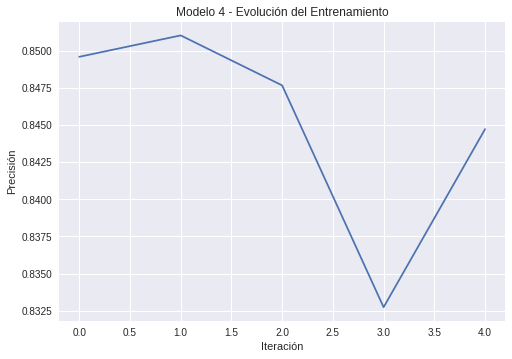

In [39]:
# Realizar validación cruzada
scores = cross_val_score(model_4, train_features_4, train_target, cv=5, scoring='accuracy')

# Evaluar el modelo
evaluate_model(model_4, train_features_4, train_target, test_features_4, test_target)

# Graficar la evolución del entrenamiento
plt.plot(scores)
plt.title('Modelo 4 - Evolución del Entrenamiento')
plt.xlabel('Iteración')
plt.ylabel('Precisión')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente Carlos! Muy bien hecho! Recuerda que podríamos implementar y ver los gráficos con la otra función.

## Mis reseñas

In [40]:
# Definir el DataFrame con tus reseñas
my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',
    # ... otras reseñas ...
], columns=['review'])

# Función para normalizar las reseñas
def normalize_review(review):
    # Convertir a minúsculas
    review = review.lower()
    # Eliminar signos de puntuación
    review = re.sub(f'[{string.punctuation}]', '', review)
    # Eliminar números
    review = re.sub(r'\d+', '', review)
    return review

# Aplicar la función de normalización a cada reseña en el DataFrame
my_reviews['review_norm'] = my_reviews['review'].apply(normalize_review)

# Mostrar las reseñas normalizadas
my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Una implementación perfecta en la creación de tus reseñas y la nomralización de las mismas. Felicitaciones!

### Modelo 0

In [42]:
# Crear y entrenar el modelo DummyClassifier con la estrategia 'most_frequent'
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(train_features_0, train_target)

# Realizar predicciones con el modelo entrenado
my_reviews_pred = dummy_clf.predict(my_reviews_features_0)

# Imprimir las predicciones
for i, review in enumerate(my_reviews['review']):
    print(f'{my_reviews_pred[i]}:  {review}')

0:  I did not simply like it, not my kind of movie.
0:  Well, I was bored and felt asleep in the middle of the movie.
0:  I was really fascinated with the movie


### Modelo 1

In [43]:
# Ajustar el vectorizador TF-IDF solo a los datos de entrenamiento
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
train_features_1 = tfidf_vectorizer.fit_transform(df_reviews_train['review_norm'])

# Usar el mismo vectorizador para transformar los datos que quieres predecir
texts = my_reviews['review_norm']
my_reviews_pred_prob = model_1.predict_proba(tfidf_vectorizer.transform(texts))[:, 1]

# Imprimir las probabilidades de predicción
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.15:  i did not simply like it not my kind of movie
0.25:  well i was bored and felt asleep in the middle of the movie
0.47:  i was really fascinated with the movie


### Modelo 3

In [55]:
# Aplicar la función de preprocesamiento a las nuevas reseñas
my_reviews['review_spacy'] = my_reviews['review_norm'].apply(text_preprocessing_3)

# Vectorizar las nuevas reseñas utilizando el mismo vectorizador TF-IDF que se ajustó durante el entrenamiento
my_reviews_features_3 = tfidf_vectorizer.transform(my_reviews['review_spacy'])

# Realizar predicciones con el modelo entrenado
my_reviews_pred_prob = model_3.predict_proba(my_reviews_features_3)[:, 1]

# Imprimir las probabilidades de predicción
for i, review in enumerate(my_reviews['review_spacy'].str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.15:  I do not simply like it not my kind of movie
0.20:  well I be bored and feel asleep in the middle of the movie
0.50:  I be really fascinated with the movie


### Modelo 4

In [45]:
# Cargar el vectorizador TF-IDF guardado
tfidf_vectorizer_4 = joblib.load('tfidf_vectorizer_model_4.joblib')

# Aplicar la función de preprocesamiento a las nuevas reseñas
my_reviews['review_spacy'] = my_reviews['review_norm'].apply(text_preprocessing_4)

# Vectorizar las nuevas reseñas utilizando el mismo vectorizador TF-IDF
test_features_4 = tfidf_vectorizer_4.transform(my_reviews['review_spacy'])

# Realizar predicciones con el modelo entrenado LGBMClassifier
my_reviews_pred_prob = model_4.predict_proba(test_features_4)[:, 1]

# Imprimir las probabilidades de predicción
for i, review in enumerate(my_reviews['review_spacy'].str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.60:  simply like kind movie
0.29:  bored feel asleep middle movie
0.61:  fascinated movie


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelentes pruebas sobre tus reseñas Carlos, lo has hecho muy bien! Felicitaciones!

## Conclusiones

<div class="alert alert-info"> <b>Comentario del estudiante CORREGIDO 2:</b> 

<b>Desempeño de los modelos:</b> Los cuatro modelos presentados muestran diferentes niveles de rendimiento. El Modelo 0 (Constante) tiene una precisión de 0.50 en el conjunto de entrenamiento y pruebas, pero un valor F1 de 0.00, lo que indica que no tiene capacidad predictiva real más allá de la clase predominante. El Modelo 1 (NLTK, TF-IDF y LR) y el Modelo 3 (spaCy, TF-IDF y LR) tienen un rendimiento similar, con una precisión y un valor F1 de 0.88 en el conjunto de pruebas. El Modelo 4 (spaCy, TF-IDF y LGBMClassifier) tiene un rendimiento ligeramente inferior, con una precisión y un valor F1 de 0.85 en el conjunto de pruebas, lo que podría indicar un ligero sobreajuste o la necesidad de ajustar los parámetros para mejorar su generalización.

<b>Diferencias en los resultados de las reseñas:</b> Los resultados muestran que el Modelo 0 (Constante) predice un valor constante de 0.00 para todas las reseñas, lo que confirma que no tiene capacidad predictiva real. En contraste, los Modelos 1, 3 y 4 asignan probabilidades de predicción diferentes para las reseñas, lo que sugiere una capacidad de diferenciación entre reseñas positivas y negativas. El Modelo 1 y el Modelo 3 asignan probabilidades de predicción más bajas para las reseñas negativas y una probabilidad moderada para la reseña positiva, mientras que el Modelo 4 asigna probabilidades más altas a las reseñas negativas y positivas, lo que podría indicar una mayor sensibilidad a características que interpreta como positivas. Estas diferencias en las probabilidades de predicción entre los modelos pueden atribuirse a las técnicas de preprocesamiento y los algoritmos de clasificación utilizados.

<b>Conclusión general:</b> El Modelo 1 (NLTK, TF-IDF y LR) y el Modelo 3 (spaCy, TF-IDF y LR) superan el objetivo del proyecto de alcanzar un valor F1 de 0.88 en el conjunto de pruebas, lo que es prometedor. Sin embargo, el Modelo 0 (Constante) no tiene capacidad predictiva real, y el Modelo 4 (spaCy, TF-IDF y LGBMClassifier) tiene un rendimiento ligeramente inferior que podría requerir ajustes adicionales. Recomendaria el uso del Modelo 1 o el Modelo 3 para la tarea de clasificación de reseñas de películas en positivas y negativas.</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Quiero agradecerte Carlos porque tu trabajo ha estado muy bien realizado a lo largo de todo el proceso, a su vez se puede notar tu comprensión del trabajo ya que está reflejado en tus conclusiones. Bien hecho!

# Lista de comprobación

- [x]  Abriste el notebook
- [x]  Cargaste y preprocesaste los datos de texto para su vectorización
- [x]  Transformaste los datos de texto en vectores
- [x]  Entrenaste y probaste los modelos
- [x]  Se alcanzó el umbral de la métrica
- [x]  Colocaste todas las celdas de código en el orden de su ejecución
- [x]  Puedes ejecutar sin errores todas las celdas de código 
- [x]  Hay conclusiones 